# MNIST photato dataset 다중분류

In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2024-07-01 16:42:39 +09:00)


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL

import tensorflow as tf
import keras
from keras import layers

SEED=42

In [10]:
data_root = './data'
photato_root = ['/Potato___Early_blight','/Potato___healthy','/Potato___Late_blight']

concat_root = []

for root in photato_root:
    path = [os.path.join(data_root, root, fname) for fname in os.listdir(data_root + root)]
    concat_root.append(path)
    print(path)

['/Potato___Early_blight\\001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG', '/Potato___Early_blight\\002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG', '/Potato___Early_blight\\009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG', '/Potato___Early_blight\\00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG', '/Potato___Early_blight\\0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG', '/Potato___Early_blight\\02578b86-b234-4ac0-9bc3-691b5610e2bf___RS_Early.B 7562.JPG', '/Potato___Early_blight\\0267d4ca-522e-4ca0-b1a2-ce925e5b54a2___RS_Early.B 7020.JPG', '/Potato___Early_blight\\028f9b73-142f-499a-9c7b-d7c1ed5e5506___RS_Early.B 8546.JPG', '/Potato___Early_blight\\034959c1-f1e8-4a79-a6d5-3c1d14efa2f3___RS_Early.B 7136.JPG', '/Potato___Early_blight\\03b0d3c1-b5b0-48f4-98aa-f8904670290f___RS_Early.B 7051.JPG', '/Potato___Early_blight\\042135e2-e126-4900-9212-d42d900b8125___RS_Early.B 8791.JPG', '/Potato___Early_blight\\044c3abc-0bc9-45fb-8fd5-094a

In [11]:
label_names = ['Early_blight','healthy','Late_blight']
label_names

['Early_blight', 'healthy', 'Late_blight']

## 데이터 확인

In [12]:
concat_root[0]

['/Potato___Early_blight\\001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG',
 '/Potato___Early_blight\\002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG',
 '/Potato___Early_blight\\009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG',
 '/Potato___Early_blight\\00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG',
 '/Potato___Early_blight\\0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG',
 '/Potato___Early_blight\\02578b86-b234-4ac0-9bc3-691b5610e2bf___RS_Early.B 7562.JPG',
 '/Potato___Early_blight\\0267d4ca-522e-4ca0-b1a2-ce925e5b54a2___RS_Early.B 7020.JPG',
 '/Potato___Early_blight\\028f9b73-142f-499a-9c7b-d7c1ed5e5506___RS_Early.B 8546.JPG',
 '/Potato___Early_blight\\034959c1-f1e8-4a79-a6d5-3c1d14efa2f3___RS_Early.B 7136.JPG',
 '/Potato___Early_blight\\03b0d3c1-b5b0-48f4-98aa-f8904670290f___RS_Early.B 7051.JPG',
 '/Potato___Early_blight\\042135e2-e126-4900-9212-d42d900b8125___RS_Early.B 8791.JPG',
 '/Potato___Early_blight\\044c3abc-0bc9-45f

In [13]:
import PIL.Image


photato = []
y_label = []

def make_dataset(dataset_path):
    for idx,fname in enumerate(dataset_path):
        for root in fname:
            image = PIL.Image.open('./data' + root)
            image = image.resize((224, 224))
            arr = np.array(image)
            photato.append(arr)
            y_label.append(idx) 

make_dataset( dataset_path=concat_root)

In [14]:
X = np.array(photato)
y = np.array(y_label)
X.shape,y.shape

((2152, 224, 224, 3), (2152,))

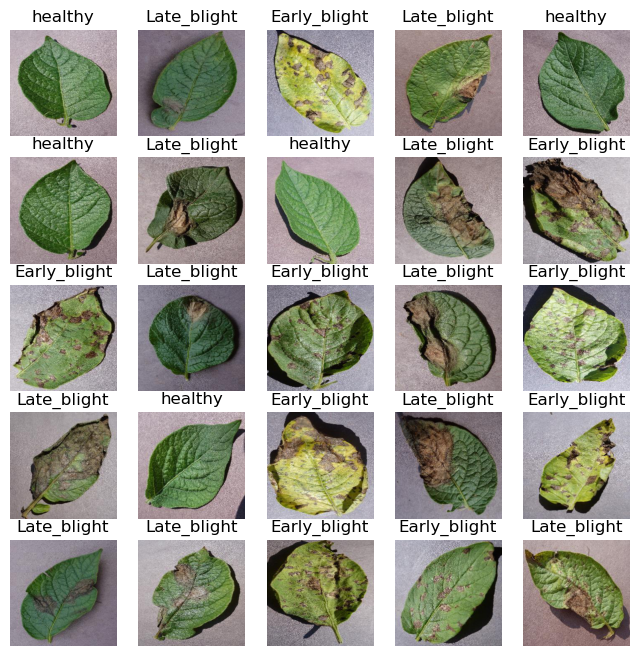

In [15]:
np.random.seed(SEED)
sample = np.random.randint(2000,size=25)

plt.figure(figsize=(8, 8))
for i, idx in enumerate(sample):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X[idx], cmap='gray')
    plt.title(label_names[y[idx]])
    plt.axis('off')

In [16]:
pd.Series(y).value_counts()

0    1000
2    1000
1     152
Name: count, dtype: int64

In [17]:
## 학습용, 검증용 데이터 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [18]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((1721, 224, 224, 3), (431, 224, 224, 3), (1721,), (431,))

## 전처리

In [19]:
# min max scale
X_train_m = X_train/255.0
X_test_m = X_test/255.0

In [20]:
X_train_s = X_train_m.reshape(-1,28,28,1)
X_test_s = X_test_m.reshape(-1,28,28,1)

X_train_s.shape,X_test_s.shape

((330432, 28, 28, 1), (82752, 28, 28, 1))

In [21]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
y_train_o = ohe.fit_transform(y_train.reshape(-1,1))
y_test_o = ohe.transform(y_test.reshape(-1,1))

y_train_o.shape,y_test_o.shape

c:\Users\hyundong\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((1721, 3), (431, 3))

In [22]:
X_train_m.shape,y_train_o.shape

((1721, 224, 224, 3), (1721, 3))

In [23]:
y_train_o

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

## 모델 1 : CNN

In [17]:
model = keras.Sequential([
    layers.Conv2D(filters=64,kernel_size=3,strides=1,padding='valid',input_shape=(224,224,3),activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=32,kernel_size=3,strides=1,activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(3,activation='softmax'),
])

c:\Users\hyundong\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


time: 171 ms (started: 2024-07-01 16:42:54 +09:00)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 93312)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,944,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,975,235 (45.68 MB)

 Trainable params: 11,975,235 (45.68 MB)

 Non-trainable params: 0 (0.00 B)

time: 16 ms (started: 2024-07-01 16:42:55 +09:00)


In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

time: 16 ms (started: 2024-07-01 16:42:55 +09:00)


In [20]:
history = model.fit(X_train_m,
          y_train_o,
          epochs=10,
          batch_size=1,
          validation_split=0.2)

Epoch 1/10
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 64s 44ms/step - accuracy: 0.4926 - loss: 1.0378 - val_accuracy: 0.7739 - val_loss: 0.7726
Epoch 2/10
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 61s 44ms/step - accuracy: 0.7656 - loss: 0.6843 - val_accuracy: 0.7768 - val_loss: 0.6451
Epoch 3/10
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 60s 44ms/step - accuracy: 0.8247 - loss: 0.5443 - val_accuracy: 0.8087 - val_loss: 0.5892
Epoch 4/10
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 61s 44ms/step - accuracy: 0.8408 - loss: 0.4390 - val_accuracy: 0.8000 - val_loss: 0.5850
Epoch 5/10
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 62s 45ms/step - accuracy: 0.8965 - loss: 0.2828 - val_accuracy: 0.7826 - val_loss: 0.9184
Epoch 6/10
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 64s 46ms/step - accuracy: 0.9233 - loss: 0.2370 - val_accuracy: 0.7797 - val_loss: 0.8399
Epoch 7/10
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 65s 47ms/step - accuracy: 0.9546 - loss: 0.1507 - val_accuracy: 0.7768 - val_loss: 1.2960
Epoch 8/10
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 63s 46ms/step - accuracy: 0.9838 -

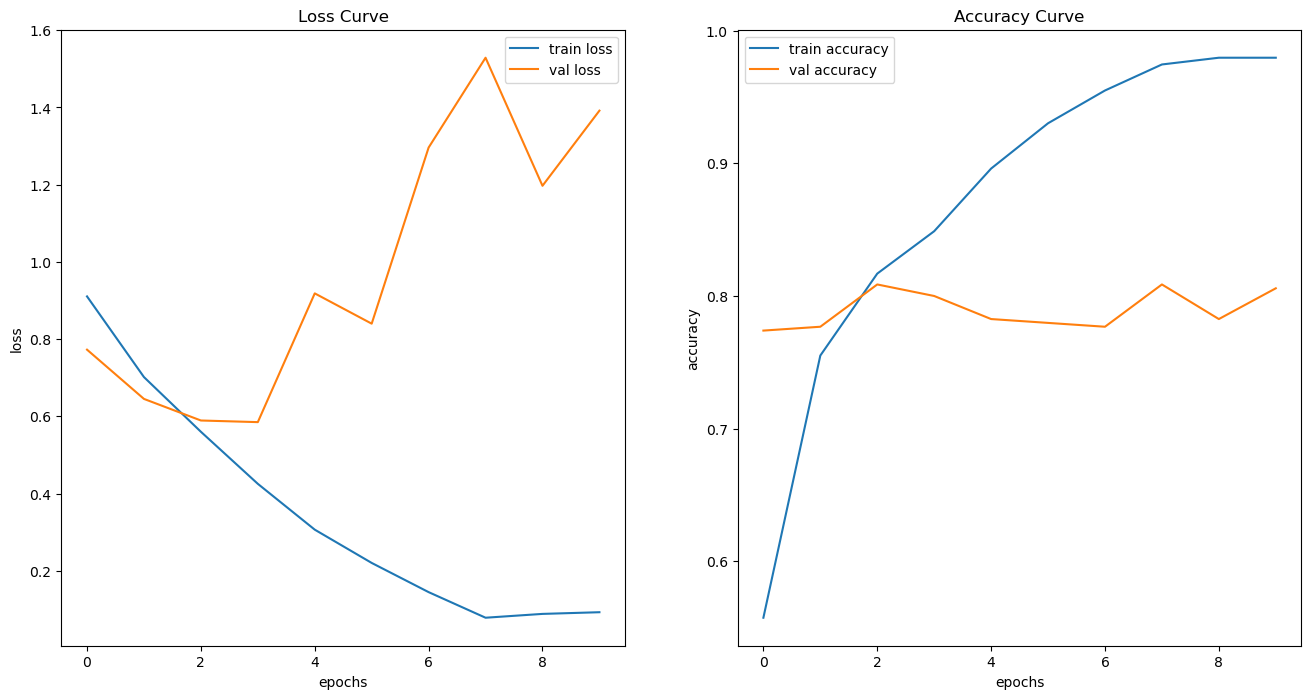

time: 421 ms (started: 2024-07-01 16:53:21 +09:00)


In [21]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()
    
plot_history(history)

In [23]:
y_pred = model.predict(X_test_m)
y_pred

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step


array([[9.6722124e-03, 4.6347631e-03, 9.8569298e-01],
       [1.3227385e-04, 2.6593641e-05, 9.9984109e-01],
       [9.9999976e-01, 2.4604023e-09, 2.5493995e-07],
       ...,
       [1.0000000e+00, 6.4620642e-09, 4.7416976e-10],
       [1.0000000e+00, 4.0621391e-09, 7.5233846e-09],
       [1.0000000e+00, 2.7667427e-13, 4.9675319e-10]], dtype=float32)

time: 1.8 s (started: 2024-07-01 16:53:33 +09:00)


In [24]:
# 정확도 출력
y_pred_val = np.argmax(y_pred,axis=1)
y_test_val = np.argmax(y_test_o,axis=1)

time: 0 ns (started: 2024-07-01 16:53:37 +09:00)


accuracy: 0.7842227378190255
recall: 0.5799325987295912
precision: 0.5838109602815486
f1 : 0.5780245159100925


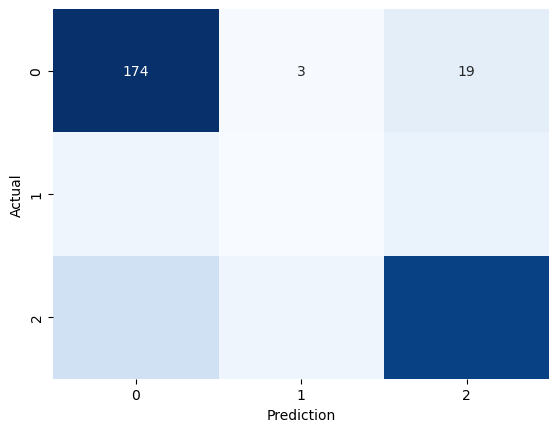

time: 250 ms (started: 2024-07-01 16:53:37 +09:00)


In [25]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

def print_metrics(y_true, y_pred, aver='binary'):
    print('accuracy:', accuracy_score(y_true, y_pred))
    print('recall:', recall_score(y_true, y_pred ,average=aver))
    print('precision:', precision_score(y_true, y_pred,average=aver))
    print('f1 :', f1_score(y_true, y_pred, average=aver))

    cfm = confusion_matrix(y_true, y_pred)
    s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
    s.set(xlabel='Prediction', ylabel='Actual')
    plt.show()

print_metrics(y_test_val, y_pred_val, aver='macro')

## 모델 2 : transfer VGG16

In [24]:
from keras.applications.vgg16 import VGG16


base_model = VGG16(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [36]:
from keras import layers, models


# VGG16 베이스 모델 위에 새 모델을 만듭니다.
model_t = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(3, activation='softmax'),
])

# 새 모델의 요약을 출력합니다.
# model_t.summary()

In [37]:
model_t.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [38]:
EPOCHS = 10
BATCH_SIZE = 1

history = model_t.fit(X_train_m, y_train_o,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split=0.2)

Epoch 1/10
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.7197 - loss: 0.7022

KeyboardInterrupt: 

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

plot_history(history)

In [ ]:
y_pred_t = model_t.predict(X_test_s)
y_pred_t

In [ ]:
# 정확도 출력
y_pred_t = np.argmax(y_pred_t,axis=1)
y_test_t = np.argmax(y_test_o,axis=1)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

def print_metrics(y_true, y_pred, aver='binary'):
    print('accuracy:', accuracy_score(y_true, y_pred))
    print('recall:', recall_score(y_true, y_pred ,average=aver))
    print('precision:', precision_score(y_true, y_pred,average=aver))
    print('f1 :', f1_score(y_true, y_pred, average=aver))

    cfm = confusion_matrix(y_true, y_pred)
    s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
    s.set(xlabel='Prediction', ylabel='Actual')
    plt.show()

print_metrics(y_test_t, y_pred_t, aver='macro')